# Histopathological image classification

## Context

The Breast Cancer Histopathological Image dataset (BreakHis) is  composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X).  To date, it contains 2,480  benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). This database has been built in collaboration with the P&D Laboratory  – Pathological Anatomy and Cytopathology, Parana, Brazil (http://www.prevencaoediagnose.com.br). 

* The aim of this practical work is to become familiar with the classification of images using "classical" machine learning techniques (NOT DEEP LEARNING).

* The data to be used are those provided by Spanhol et al [1], available here: https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/. 


* We will use a subsample of 200 images with a magnification of 40X (700x460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format).  These images correspond to samples of breast tumors that are either benign or malignant. 

* You will use several classification methods seen along the course in order to try to train a model capable of discriminating images between these two classes. 

[1] Spanhol, F., Oliveira, L. S., Petitjean, C., Heutte, L., A Dataset for Breast Cancer Histopathological Image Classification, IEEE Transactions on Biomedical Engineering (TBME), 63(7):1455-1462, 2016.

### Modalités de rendu

- Vous devez rendre le notebook sur Mootse avant le 23/12 à minuit 
- Vous pouvez travailler en binome. Vous devez alors modifier le titre du notebook pour faire apparaitre les deux noms. 
- Tous les résultats obtenus doivent être **commenté** 

## Image feature extraction

Before trying any machine learning model, you need to extract features from your image, meaning you need to convert each image into a set of vectors (features) best describing the image. These vectors are then used as the input for your ML model. We propose a small example of feature extraction from images using the open-CV library on Python. You are expected to explore this part more deeply for the project. We also guide you for the beginning. 

### Some imports

Here are some imports that will be useful for the practical. 
* cv2 : `pip install opencv-python`

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

### Getting the data 

To download the data, follow this link - then unzip the file

https://drive.google.com/file/d/13aXl1v30HoR5kFIa4lGgB4AouV89YafM/view?usp=sharing

### 1.2 - Data visualisation

* A first step is to create the list of all available images using the `os.listdir` function provided by `os` library (https://docs.python.org/3/library/os.html).

* Write the code to get all the filenames, print the total number of files and show the first image of the list using `skimage.io` library (https://scikit-image.org/docs/dev/api/skimage.io.html)

These are 200 images: 
SOB_B_F-14-23060CD-40-001.png
SOB_B_F-14-23060CD-40-002.png
SOB_B_F-14-23060CD-40-003.png
SOB_B_F-14-23060CD-40-004.png
SOB_B_F-14-23060CD-40-005.png
SOB_B_F-14-23060CD-40-006.png
SOB_B_F-14-23060CD-40-007.png
SOB_B_F-14-23060CD-40-008.png
SOB_B_F-14-23060CD-40-009.png
SOB_B_F-14-23060CD-40-010.png
SOB_B_F-14-23060CD-40-011.png
SOB_B_F-14-23060CD-40-012.png
SOB_B_F-14-23060CD-40-013.png
SOB_B_F-14-23060CD-40-014.png
SOB_B_F-14-23222AB-40-001.png
SOB_B_F-14-23222AB-40-002.png
SOB_B_F-14-23222AB-40-003.png
SOB_B_F-14-23222AB-40-004.png
SOB_B_F-14-23222AB-40-005.png
SOB_B_F-14-23222AB-40-006.png
SOB_B_F-14-23222AB-40-007.png
SOB_B_F-14-23222AB-40-008.png
SOB_B_F-14-23222AB-40-009.png
SOB_B_F-14-23222AB-40-010.png
SOB_B_F-14-23222AB-40-011.png
SOB_B_F-14-23222AB-40-012.png
SOB_B_F-14-23222AB-40-013.png
SOB_B_F-14-23222AB-40-014.png
SOB_B_F-14-23222AB-40-015.png
SOB_B_F-14-23222AB-40-016.png
SOB_B_F-14-23222AB-40-017.png
SOB_B_TA-14-15275-40-001.png
SOB_B_TA-14-15275-

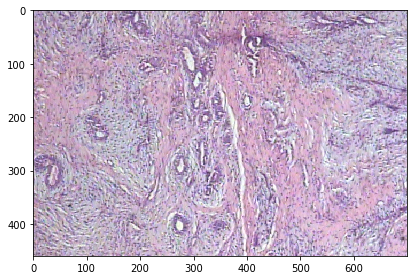

In [2]:
from skimage import io

# get images list from folder
path='F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Subsample_Histo'
images_list = os.listdir(path)
img_path = []
print(f'These are {len(images_list)} images: ')
for name in images_list:
    print(name)
    img_path.append(path + '/' + name) # Read in the complete image path.

# images visualisation
img_01 = io.imread(path + '/' + images_list[0])
io.imshow(img_01)
io.show()


### 1.3 - Dataset building

* Now we can build a pandas `DataFrame` to store the information about the images. All the informations are contained in the filename of each image. 

* For example, SOB_B_TA-14-4659-40-001.png is the image 1, at magnification factor 40X, of a benign tumor of type tubular adenoma, original from the slide 14-4659, which was collected by procedure SOB. 

* Using the function `str.split` create new columns in the dataframe corresponding to the class, subclass and slide from each image. Print informations about the number of images of each class and each subclass.

In [3]:
# creation of the main dataframe

df=pd.DataFrame(columns=('class','subclass','slide', 'path'),index=[i for i in range(200)])
# get info from the filenames and enrich the dataframe
# by adding columns 'class', 'subclass' and 'slide'
class_list = []
subclass_list = []
slide_list = []
for name in images_list:
    # print('class', name.split('_', 1)[0])
    class_list.append(name.split('_', 1)[0])
    # print('subclass', name.split('_', 1)[1].split('-', 1)[0])
    subclass_list.append(name.split('_', 1)[1].split('-', 1)[0])
    # print('slide', name.split('-', 1)[1].split('-40-')[0])
    slide_list.append(name.split('-', 1)[1].split('-40-')[0]) # Divide the file name into column names based on key symbols.
#get my Dataframe
df = pd.DataFrame({'class': class_list,
                   'subclass': subclass_list,
                   'slide': slide_list,
                   'path': img_path})
df

,class,subclass,slide,path
0,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
1,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
2,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
3,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
4,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
...,...,...,...,...
195,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
196,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
197,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...
198,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...


* Now you can create a more advanced visualisation of the images like shown below by using `ImageGrid` object from the `matplotlib` library (https://matplotlib.org/3.1.3/gallery/axes_grid1/simple_axesgrid.html). Here we visualise the 4 first images of each class.

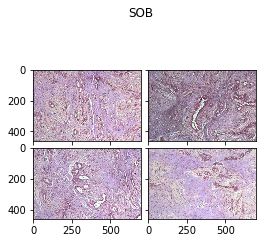

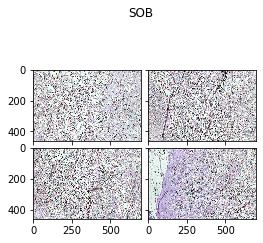

not enough to 4


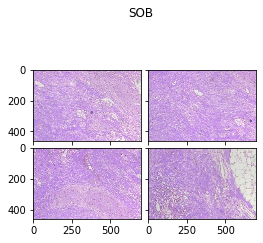

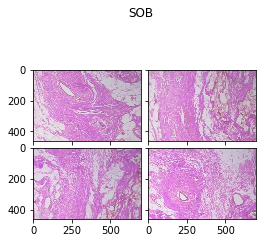

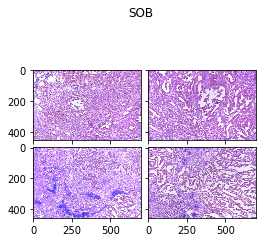

In [4]:
# plot 4 images for each class

# First divide the whole list according to the class
groups = df.groupby(df['subclass'])
df_BF = groups.get_group('B_F')
df_BTA = groups.get_group('B_TA')
df_MDC = groups.get_group('M_DC')
df_MLC = groups.get_group('M_LC')
df_MMC = groups.get_group('M_MC')
df_MPC = groups.get_group('M_PC')

def visualise4(df):
    
    df_4 = df.head(4)  # Take out the first four lines of the class
    imgplt_list = []
    for index, row in df_4.iterrows():  # Iterate over all rows
        tmp = cv2.imread(row['path'])
        imgplt_list.append(np.array(tmp))
    if len(imgplt_list)<4:
        print('not enough to 4')
        return
    else:
        fig = plt.figure(figsize=(4., 4.))
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                         axes_pad=0.1,  # pad between axes in inch.
                         )
        
        for ax, im in zip(grid, [imgplt_list[0], imgplt_list[1], imgplt_list[2], imgplt_list[3]]):
            # Iterating over the grid returns the Axes.
            ax.imshow(im)
        fig.suptitle((str)(df_4['class'].iloc[1]))
        plt.show()
# images visualisation
        
visualise4(df_BF)
visualise4(df_BTA)
visualise4(df_MDC)
visualise4(df_MLC)
visualise4(df_MMC)
visualise4(df_MPC)


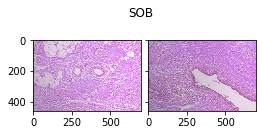

In [5]:
# for the class SOB_M_DC, draw a figure for it alone.

fig = plt.figure(figsize=(4., 2.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 1x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
imgplt_list = []
for index, row in df_MDC.iterrows():
    tmp = cv2.imread(row['path'])
    imgplt_list.append(np.array(tmp))
for ax, im in zip(grid, [imgplt_list[0], imgplt_list[1]]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
fig.suptitle((str)(df_MDC['class'].iloc[1]))
plt.show()

### 1.4 - Features extraction

* The feature extraction is necessary to extract information from the raw data, in order to enrich their description. Selecting the most meaningful features is a crucial step in the process of classification problems.

* The selected set of features should be a small set whose values efficiently discriminate among patterns of the different classes, but are similar for patterns within the same class.

* Here we will calculate 3 global features on each image. To do so, we can use functions from `OpenCV` and `mahotas` libraries: 

  * Hu moments: https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html
  * Haralick: https://mahotas.readthedocs.io/en/latest/features.html
  * Color histogram in HSV: https://docs.opencv.org/master/dd/d0d/tutorial_py_2d_histogram.html

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#!pip install mahotas
import mahotas


# parameters for the features extraction
bins = 8
fixed_size = tuple((175, 115))

In [7]:
# import mahotas.features  # just for test if i solved the problem about module 'mahotas' has no attribute 'features'

In [8]:
# functions to extract features from the images
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# Define the function to extract Haralick features
def fd_Haralick(image):
    img = image[:, :, 0]  # Convert Image 2D to 3D
    features = mahotas.features.haralick(img)
    # features = mahotas.features.texture.haralick_features(img)
    feature = np.mean(features, axis=0)  # get mean value of cols
    return feature


# Define the function to extract image histogram
def color_histogram(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256]) # Extract the value of the s field
    hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256]) # Extract the value of the v field
    df1 = pd.DataFrame(hist_s)
    df2 = pd.DataFrame(hist_v)
    hist = df1.append(df2) # Merge two df
    return hist

def feature_extraction(img_path):

    # read image from the path
    img = io.imread(img_path)
    # Extract three features corresponding to Hu moments, Haralick and Color histogram in HSV respectively.
    feature_hu = fd_hu_moments(img)
    feature_hrk = fd_Haralick(img)
    feature_hsv = color_histogram(img)
    df_hu = pd.DataFrame(feature_hu)
    df_hrk = pd.DataFrame(feature_hrk)
    df_hsv = feature_hsv
    # Merge into one dataframe of column 1
    features = df_hu.append(df_hrk.append(df_hsv, ignore_index=True), ignore_index=True)
    # print(features)
    # return features.values[:, 0]
    return features.values

In [9]:
# Extract the 3 features of all images.
features = []
for path in img_path:
    # For each image, the corresponding feature is extracted.
    features.append(feature_extraction(path)[:, 0])
df_features = pd.DataFrame(features)
result = pd.concat([df, df_features], axis=1, join='outer')# Get the horizontal union of two dataframes.
result

,class,subclass,slide,path,0,1,2,3,4,5,...,522,523,524,525,526,527,528,529,530,531
0,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001013,1.648643e-07,1.918981e-13,3.491019e-13,3.932382e-26,6.531244e-17,...,754.0,725.0,704.0,669.0,574.0,566.0,600.0,522.0,471.0,3123.0
1,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001251,2.355563e-07,1.434093e-12,1.672744e-12,1.891266e-24,6.801969e-16,...,140.0,123.0,95.0,93.0,80.0,78.0,60.0,62.0,48.0,143.0
2,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001012,1.598484e-07,4.107159e-13,1.748831e-13,4.050506e-26,6.990674e-17,...,920.0,909.0,911.0,912.0,939.0,952.0,947.0,994.0,1003.0,4607.0
3,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000955,1.450796e-07,9.717902e-14,2.331154e-13,1.716479e-27,4.144821e-17,...,949.0,911.0,812.0,773.0,683.0,655.0,620.0,637.0,537.0,2807.0
4,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000943,1.388612e-07,1.116372e-14,9.402918e-14,-2.703394e-27,1.262527e-17,...,1004.0,798.0,726.0,715.0,595.0,579.0,543.0,544.0,473.0,2438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001008,1.654486e-07,5.299428e-13,6.189111e-13,3.488342e-25,2.454245e-16,...,4071.0,4417.0,4511.0,4673.0,4944.0,5061.0,5408.0,5751.0,5985.0,84482.0
196,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001034,1.751267e-07,2.647972e-13,2.164620e-13,4.177804e-26,5.775108e-17,...,3819.0,4001.0,4109.0,4370.0,4315.0,4698.0,4867.0,5282.0,5926.0,74673.0
197,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.001073,1.848419e-07,6.618715e-13,9.447352e-13,2.820208e-25,3.908998e-16,...,3202.0,3188.0,3310.0,3323.0,3448.0,3617.0,3838.0,4030.0,4345.0,61816.0
198,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000970,1.543880e-07,7.940006e-13,1.723320e-13,5.743589e-26,3.661036e-17,...,4865.0,5277.0,5479.0,5798.0,6006.0,6646.0,7133.0,7867.0,8288.0,72575.0


* Add here the code to calculate and normalize the features for each image in the list to extend the `DataFrame` defined earlier. Note that there are 7 values for the Hu moments, 13 for the Haralick features and 512 for the histogram. At the end, the `DataFrame` contains 532 values between 0 and 1 for the global features calculated.

In [14]:
from sklearn.preprocessing import MinMaxScaler

features_forScaler = []
for path in img_path:
    # For each image, the corresponding feature is extracted.
    features_forScaler.append(feature_extraction(path))
# features extraction
features_extraction = []
scaler = MinMaxScaler() # Normalization operation.
for feature in features_forScaler:
    # Traverse each feature sequence
    data_max_min = scaler.fit_transform(feature)
    features_extraction.append(data_max_min[:, 0])

df_fe = pd.DataFrame(features_extraction)
df_final = pd.concat([df, df_fe], axis=1, join='outer')# Get the horizontal union of two dataframes.
df_final

,class,subclass,slide,path,0,1,2,3,4,5,...,522,523,524,525,526,527,528,529,530,531
0,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.091929,0.088394,0.085834,0.081567,0.069987,0.069011,0.073156,0.063647,0.057430,0.380722
1,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,...,0.018489,0.016246,0.012551,0.012287,0.010572,0.010308,0.007933,0.008197,0.006350,0.018884
2,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.112070,0.110730,0.110974,0.111095,0.114384,0.115968,0.115358,0.121083,0.122179,0.561151
3,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.116328,0.111670,0.099537,0.094757,0.083726,0.080294,0.076005,0.078088,0.065832,0.344048
4,SOB,B_F,14-23060CD,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000016,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.114862,0.091298,0.083062,0.081803,0.068077,0.066246,0.062128,0.062243,0.054121,0.278895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.048189,0.052285,0.053397,0.055315,0.058523,0.059907,0.064015,0.068075,0.070845,1.000000
196,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.051144,0.053582,0.055028,0.058523,0.057787,0.062916,0.065179,0.070737,0.079361,1.000000
197,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.051801,0.051574,0.053548,0.053758,0.055780,0.058514,0.062089,0.065195,0.070291,1.000000
198,SOB,M_PC,14-12465,F:/XUEXI/FISE3/INFO/Option/AlgoANDA/projet/Sub...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.067035,0.072712,0.075496,0.079891,0.082757,0.091576,0.098286,0.108400,0.114200,1.000000


## 2. Model training


### 2.1 - Principal component analysis (PCA)

* A good way to understand and evaluate the difficulty of separating the two classes is to visually look at the data. Principal component analysis (PCA) consists in a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

* By projecting the dataset in a 2-dimensions space, they can be visualised to identify their distribution according to their class.

* Use the `PCA` function of `sklearn` to view the dataset in 2D: [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[[ 2.85558149 -2.43049515]
 [ 1.82711806 -2.95758334]
 [ 2.75741785 -2.41204597]
 [ 2.66427513 -2.27827193]
 [ 2.43670817 -2.12729962]
 [-0.86509574 -0.99519162]
 [-0.31437204 -1.53181495]
 [ 2.84272952 -2.36563068]
 [ 2.02873806 -2.34408695]
 [ 2.4553254  -2.47912053]
 [ 3.01928319 -2.26521794]
 [ 2.45736174 -2.60673266]
 [ 2.70475419 -2.573238  ]
 [ 1.29318631 -2.11136539]
 [-2.22588176 -0.47755248]
 [-2.4633289  -0.41700797]
 [-2.68613935 -0.32158234]
 [-1.86191717 -0.76376007]
 [-2.068436   -0.56751604]
 [-2.0832364  -0.6241965 ]
 [-1.85094475 -0.80731088]
 [-2.17742139 -0.55927602]
 [-1.18753507 -1.03139908]
 [-2.38916964 -0.44419971]
 [-2.50534082 -0.39135288]
 [-2.01887348 -0.65695056]
 [-2.37879644 -0.47637781]
 [-2.16733629 -0.57231673]
 [-2.3821337  -0.48056234]
 [-2.63882461 -0.33975766]
 [-2.31184394 -0.51243803]
 [-2.68911807 -0.33255557]
 [-2.59989298 -0.39698682]
 [-2.60202174 -0.38193226]
 [-2.13401658 -0.58749332]
 [-1.11664832 -1.12620318]
 [-2.51286008 -0.42646408]
 

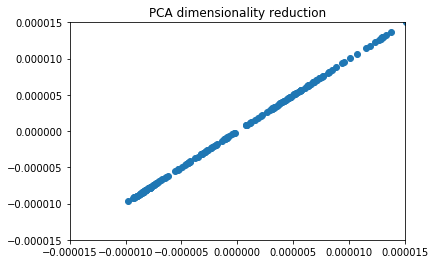

In [31]:
from sklearn.decomposition import PCA

# classify with test/train split regardless of the slide
X = df_final.iloc[:,4:]  # remove the 4 first columns of the data
y = df_final.iloc[:,2]   # keep only the second column

pca = PCA(n_components=2)
newData = pca.fit_transform(X)
print(newData)
x_pca=np.dot(newData,pca.components_)
plt.title("PCA dimensionality reduction")
plt.xlim(-0.000015,0.000015)
plt.ylim(-0.000015,0.000015)
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.show()


* An popular alternative to PCA is TSNE (T-distributed Stochastic Neighbor Embedding)
* PCA is a mathematical approach and tries to separate points as far as possible based on highest variance
* TSNE is a probabilistic approach and tries to group points as close as possible based on probability that two close points came from the same population distribution
* More information on differences between PCA and TSNE can be found [here](https://towardsdatascience.com/pca-vs-tsne-el-cl%C3%A1sico-9948181a5f87)
* Use the `TNSE` function of `sklearn` to view the dataset in 2D: [sklearn.manifold.TNSE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

One data dimension is 532. Other data dimension is 2
[[ 2.3824640e-01  9.7365465e+00]
 [-3.3667147e-01  1.1846276e+01]
 [ 1.0887029e-02  9.4447088e+00]
 [ 2.0004449e+00  9.8328056e+00]
 [ 1.8306863e+00  9.9234810e+00]
 [ 8.9257412e+00  4.5516615e+00]
 [ 7.8782239e+00  4.6886883e+00]
 [ 2.4652275e-01  9.8504715e+00]
 [ 1.0060631e+00  8.9320030e+00]
 [ 7.6326257e-01  9.2838135e+00]
 [-3.9312986e-01  9.5415697e+00]
 [ 2.1790674e+00  9.2035599e+00]
 [ 1.0063403e+00  9.7267380e+00]
 [ 8.0625570e-01  8.4692831e+00]
 [ 1.0505923e+01 -1.5941443e+00]
 [ 9.3108454e+00 -1.7885468e+00]
 [ 8.6096544e+00 -2.7781379e+00]
 [ 9.5875616e+00  9.6436483e-01]
 [ 9.4883118e+00 -3.4015976e-02]
 [ 8.8632517e+00  1.4228151e+00]
 [ 8.9406490e+00  2.5466313e+00]
 [ 1.0150247e+01 -1.0555488e+00]
 [ 8.5612211e+00  3.3616924e+00]
 [ 7.9993010e+00 -2.2653675e-01]
 [ 8.2444143e+00 -9.4354129e-01]
 [ 8.9399118e+00  7.7944964e-01]
 [ 8.8647108e+00 -5.9977716e-01]
 [ 8.9419498e+00  6.0154952e-02]
 [ 9.2546558e+00 -1.050

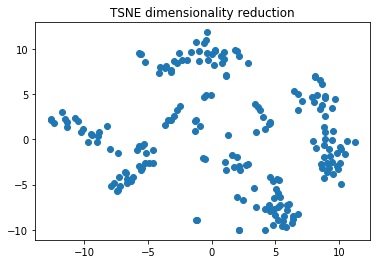

In [37]:
from sklearn.manifold import TSNE

# calculate and show TSNE on the data
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
print("One data dimension is {}. Other data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))
print(X_tsne)

plt.title("TSNE dimensionality reduction")
plt.scatter(X_tsne[:,0],X_tsne[:,1])
plt.show()

### Ready for Machine Learning ? From here, it is up to you!

A small checklist of questions to ask yourself before you start ! 
- What kind of task do I have to solve (supervised ? regression or classification ?) 
- Hence, what are the models at my disposal ? 
- What are the suitable metrics that I should use to evaluate my model ? 

In [ ]:
# The type of task to solve is classification.
# We can use models such as SVM and decision tree to complete the classification task.

### Bonus ! 

- Explore and test a deep learning model (CNN are probably the most appropriate ones). Python offers interesting framework to ease the use of these models: TensorFlow (Keras) or Pytorch are the most common ones. 

- You can perform multi-class classification as you have different types of malignant or begnin tumor (MC, PC, etc.). This information can be found in the name of the file (after the letter B or M. Use this as a label instead of the B vs. M first task. 

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation
from keras.optimizers import SGD

In [ ]:
def cnn_model(data_df, path):
    
    # print(data_df.shape) 
    # print(data_df.head())
    train_df, val_df = train_test_split(data_df, test_size=0.2, random_state=1)
    # print(val_df.head())
    datagen = ImageDataGenerator(rescale=1. / 255)

    img_width = 700
    img_height = 460
    bs = 8

    train_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=path,
                                                  x_col="subclass",
                                                  y_col=["B_F", "B_TA", "M_DC", "M_LC", "M_MC", "M_PC"],
                                                  has_ext=True,
                                                  class_mode="raw", target_size=(img_width, img_height), shuffle=True,
                                                  batch_size=bs, color_mode='rgb')

    validation_generator = datagen.flow_from_dataframe(dataframe=val_df, directory=path,
                                                       x_col="subclass",
                                                       y_col=["B_F", "B_TA", "M_DC", "M_LC", "M_MC", "M_PC"],
                                                       has_ext=True,
                                                       class_mode="raw", target_size=(img_width, img_height),
                                                       shuffle=False,
                                                       batch_size=bs, color_mode='rgb')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=(1, 1), input_shape=(700, 460, 3), padding='valid', activation='relu',
                     kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(38, activation="softmax"))
    opt = SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt)
    EPOCHS = 50

    H = model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.title("Training Loss ")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    x = model.predict(validation_generator)
    return x


test_result = cnn_model(df_final, path)

# I try to build a CNN model using the t frame. Among them, I tried to divide the data into a training set and a validation set 
# at a ratio of one to five. Then add four convolutional layers and three fully connected layers. But I did not succeed.
# I think the problem is probably about loss fuction or the packages imported in Jupytor.